In [1]:
# steps
# load image data
# data preprocessing(trai test split also )
# cnn training
# model evaluation



In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:34<00:00, 23.1MB/s]
100% 2.04G/2.04G [01:34<00:00, 23.3MB/s]


In [6]:
# unzipping the downloaded dataset
with ZipFile('plantvillage-dataset.zip','r') as zip_ref:
    zip_ref.extractall()

In [7]:
# dataset path
base_dir='/content/plantvillage dataset/color'

In [19]:
# image data generator
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # 20% data for validation, so 80% will eb training image and 20 %will be testing image
)

In [20]:
# train generator
train_gen=data_gen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [21]:
# testing generator
test_gen=data_gen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


model building


In [22]:
# Model definition
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# increased filter size because as we are going deeper layer the model should able to find more complex features thats why i increased filter size
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.5))
model.add(Flatten()) #Dense layers require a flat, 1D input to perform their operations thats why flatten.
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(train_gen.num_classes,activation='softmax')) #output layer 38 neuron becoz 38 classes

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,928,806 (91.28 MB)

 Trainable params: 23,928,806 (91.28 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model Training

In [25]:
history=model.fit(train_gen,epochs=10,validation_data=test_gen)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 105s 75ms/step - accuracy: 0.5306 - loss: 1.7816 - val_accuracy: 0.8219 - val_loss: 0.5703
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 139s 73ms/step - accuracy: 0.8496 - loss: 0.4640 - val_accuracy: 0.8660 - val_loss: 0.4232
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 73ms/step - accuracy: 0.9129 - loss: 0.2673 - val_accuracy: 0.8887 - val_loss: 0.3679
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 74ms/step - accuracy: 0.9389 - loss: 0.1813 - val_accuracy: 0.8879 - val_loss: 0.3946
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 102s 75ms/step - accuracy: 0.9565 - loss: 0.1367 - val_accuracy: 0.8739 - val_loss: 0.4863
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 140s 74ms/step - accuracy: 0.9629 - loss: 0.1134 - val_accuracy: 0.8918 - val_loss: 0.4320
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 150s 80ms/step - accuracy: 0.9691 - loss: 0.0940 - val_accuracy: 0.8879 - val_loss: 0.4505
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 102s 75ms/step - accuracy: 

In [26]:
# Model Evaluation
print('Evaluating Model')
val_loss,val_accuracy=model.evaluate(test_gen)
print(f'Validation Loss:{val_loss}')
print(f'Validation Accuracy:{val_accuracy}')

Evaluating Model
340/340 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8726 - loss: 0.5911
Validation Loss:0.605390191078186
Validation Accuracy:0.8707715272903442


In [ ]:
# plotting the graphs on training and validation data
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

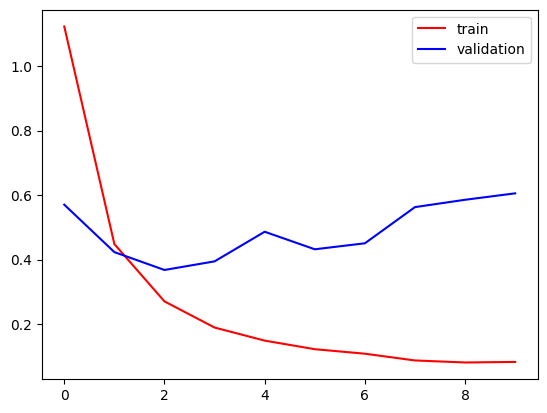

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()